<hr/>

# iRent House Prices Prediction Model - Artificial Neural Network
<hr/>

### Table of Contents
1. [DATA UNDERSTANDING](#ch1)
1. [data](#ch2)
1. [EXPLORATION DATA ANALYSIS](#ch3)
1. [WORKING WITH FEATURE DATA](#ch4)
1. [FEATURE ENGINEERING](#ch5)
1. [SCALING AND TRAINING TEST SPLIT](#ch6)
1. [CREATING A MODEL](#ch7)
1. [TRAINING THE MODEL](#ch8)
1. [EVALUATION ON TEST DATA](#ch9)
1. [PREDICTING ON A BRAND NEW HOUSE](#ch10)

<a id="ch1"></a>
## DATA UNDERSTANDING
<hr/>

This notebook **shows step-by-step how to analyze and visualize the data to predict home prices in Harare Metropolitian Province** 

<br>

The following questions will be answered throughout the Kernel:
* ***Which features are available in the data?***
* ***Which features are categorical?***
* ***Which features are numerical?***
* ***Which features contain blank, null or empty values?***
* ***What are the data types for various features?***
* ***What is the distribution of numerical feature values across the samples?***
* ***Which features are more correlated to the price?***

### data

***Feature Columns***
* **suburb:** 
* **density:** 
* **property:** 
* **price:** 
* **rooms:** 
* **bedroom:** 
* **toilets:** 
* **ensuite:** 
* **type:** 
* **constituency:** 
* **council:** 
* **carport:** 
* **pool:** 
* **furnished:** 
* **cottage:** 
* **power:** 
* **pbackup:** 
* **water:** 
* **wbackup:** 
* **gated:** 
* **garden:** 


### Imports

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

# Encoding ...
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

### Acquire data
The Python Pandas packages helps us work with our datas. We start by acquiring the datas into Pandas DataFrames.

In [2]:
data = pd.read_csv('../data/harare-metropolian-updated.csv')

### Analyze by describing data
Pandas also helps describe the datas answering following questions early in our project.

***Which features are available in the data?***

In [3]:
data.columns.values

array(['suburb', 'density', 'property', 'price', 'rooms', 'bedroom',
       'toilets', 'ensuite', 'condition', 'constituency', 'council',
       'carport', 'pool', 'furnished', 'cottage', 'power', 'pbackup',
       'water', 'wbackup', 'gated', 'garden'], dtype=object)

In [4]:
data.sample(3).T

,239,541,174
suburb,AVONDALE,BALANCING ROCKS,MUGUTA
density,LOW,COMPOUND,COMPOUND
property,CLUSTER,COTTAGE,CLUSTER
price,450,120,80
rooms,2,3,2
bedroom,0,0,0
toilets,1,1,1
ensuite,1,1,0
condition,4,3,2
constituency,MOUNT PLEASANT,EPWORTH NORTH,EPWORTH NORTH


***Which features contain blank, null or empty values?***

We can check for missing values with pandas isnull(). This indicates whether values are missing or not. Then we can sum all the values to check every column. 

In [5]:
# No missing values
data.isnull().sum()

suburb          0
density         0
property        0
price           0
rooms           0
bedroom         0
toilets         0
ensuite         0
condition       0
constituency    0
council         0
carport         0
pool            0
furnished       0
cottage         0
power           0
pbackup         0
water           0
wbackup         0
gated           0
garden          0
dtype: int64

***What are the data types for various features?***

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   suburb        782 non-null    object
 1   density       782 non-null    object
 2   property      782 non-null    object
 3   price         782 non-null    int64 
 4   rooms         782 non-null    int64 
 5   bedroom       782 non-null    int64 
 6   toilets       782 non-null    int64 
 7   ensuite       782 non-null    int64 
 8   condition     782 non-null    int64 
 9   constituency  782 non-null    object
 10  council       782 non-null    object
 11  carport       782 non-null    int64 
 12  pool          782 non-null    int64 
 13  furnished     782 non-null    int64 
 14  cottage       782 non-null    int64 
 15  power         782 non-null    int64 
 16  pbackup       782 non-null    int64 
 17  water         782 non-null    int64 
 18  wbackup       782 non-null    int64 
 19  gated   

### Outlier Handling
Box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot. Outliers may be plotted as individual points. The spacings between the different parts of the box indicate the degree of dispersion (spread). 

* We can see outliers plotted as individual points; this probably are the more expensive houses.
* We can see that the price tends to go up when the house has more bedrooms. 

[Text(0.5, 0, 'ensuite'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Ensuites vs Price Box Plot')]

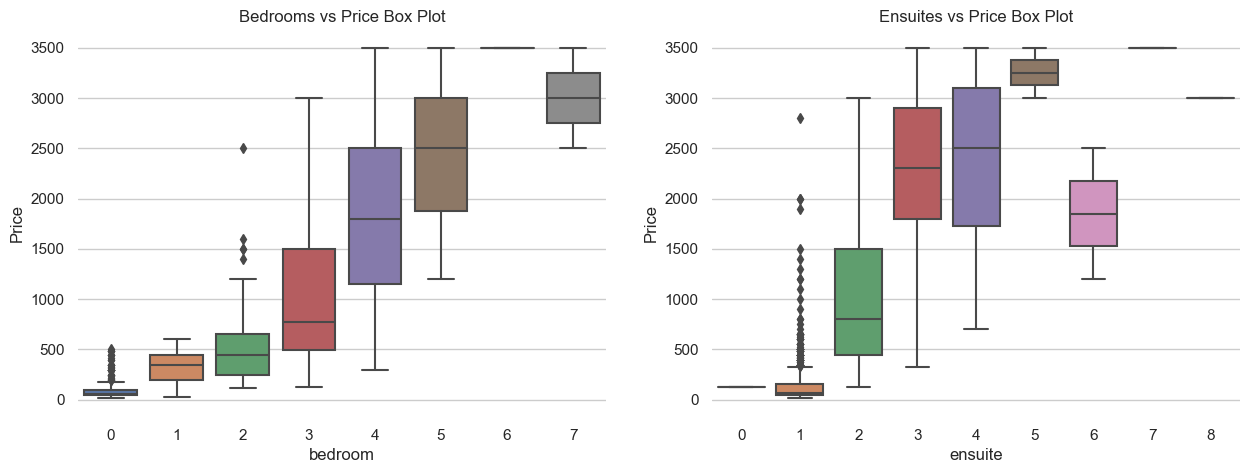

In [7]:
sns.set(style="whitegrid", font_scale=1)

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=data['bedroom'],y=data['price'], ax=axes[0])
sns.boxplot(x=data['toilets'],y=data['price'], ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='bedroom', ylabel='Price', title='Bedrooms vs Price Box Plot')
axes[1].set(xlabel='ensuite', ylabel='Price', title='Ensuites vs Price Box Plot')

[Text(0.5, 0, 'garden'),
 Text(0, 0.5, 'price'),
 Text(0.5, 1.0, 'Garden vs Price Box Plot')]

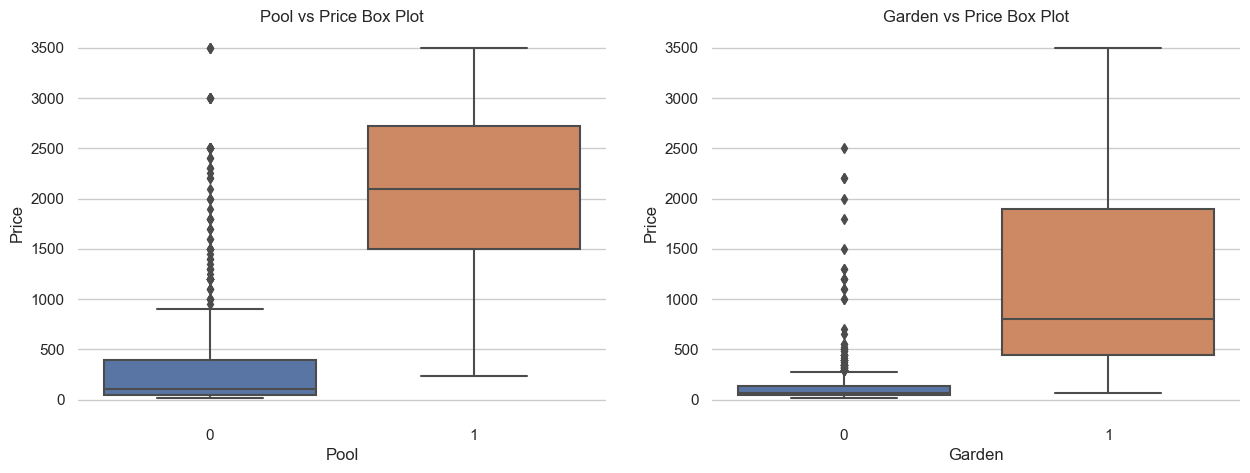

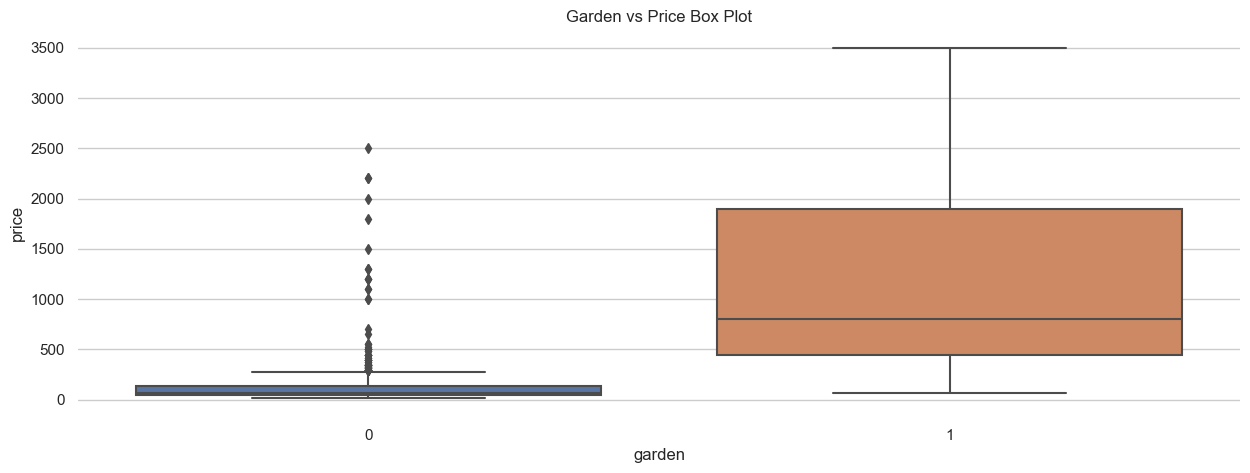

In [8]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=data['pool'],y=data['price'], ax=axes[0])
sns.boxplot(x=data['garden'],y=data['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Pool', ylabel='Price', title='Pool vs Price Box Plot')
axes[1].set(xlabel='Garden', ylabel='Price', title='Garden vs Price Box Plot')

f, axe = plt.subplots(1, 1,figsize=(15,5))
sns.boxplot(x=data['garden'],y=data['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.set(xlabel='garden', ylabel='price', title='Garden vs Price Box Plot')

<a id="ch2"></a>
## Exploratory Data Analysis
<hr/>

### Analyze the data
Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

***What is the distribution of numerical feature values across the samples?***

In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,782.0,487.774936,767.015082,20.0,55.0,125.0,500.0,3500.0
rooms,782.0,3.395141,2.321999,1.0,2.0,2.0,5.0,15.0
bedroom,782.0,1.132992,1.599523,0.0,0.0,0.0,2.0,7.0
toilets,782.0,1.368286,0.788793,0.0,1.0,1.0,2.0,8.0
ensuite,782.0,0.401535,0.740210,0.0,0.0,0.0,1.0,7.0
condition,782.0,2.893862,1.060398,1.0,2.0,3.0,4.0,5.0
carport,782.0,0.315857,0.696602,0.0,0.0,0.0,0.0,4.0
pool,782.0,0.081841,0.274298,0.0,0.0,0.0,0.0,1.0
furnished,782.0,0.326087,0.469080,0.0,0.0,0.0,1.0,1.0
cottage,782.0,0.204604,0.674450,0.0,0.0,0.0,0.0,4.0


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 800x500 with 0 Axes>

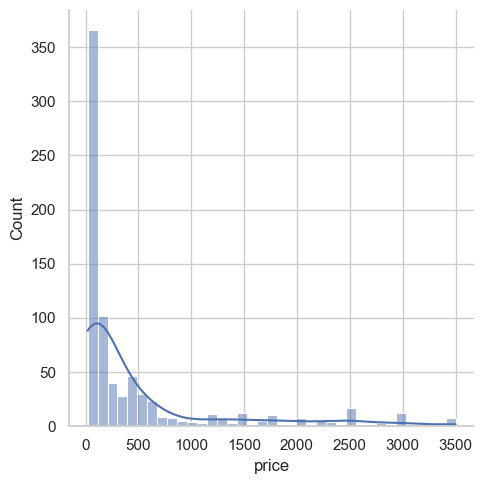

In [10]:
plt.figure(figsize = (8,5))
sns.displot(data= data['price'], kde=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

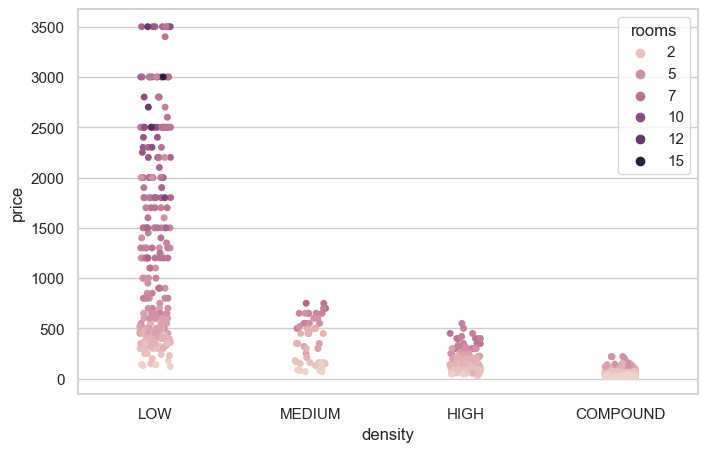

In [11]:
plt.figure(figsize = (8,5))
sns.stripplot(x = data['density'], y = data['price'], data = data, hue = data['rooms'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

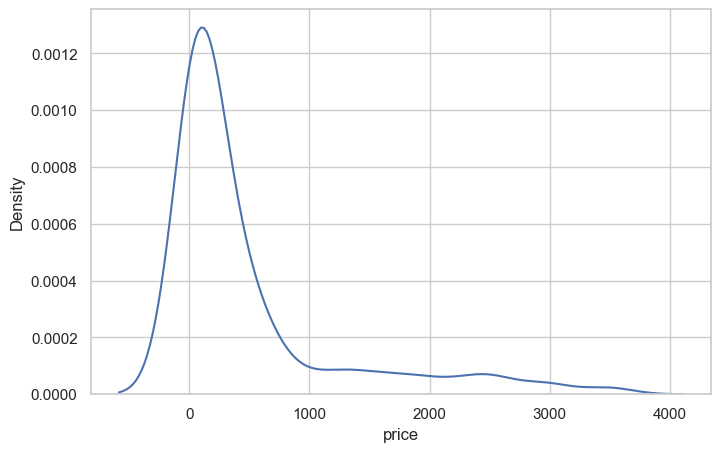

In [12]:
plt.figure(figsize = (8,5))
sns.kdeplot(data= data['price'])
plt.show

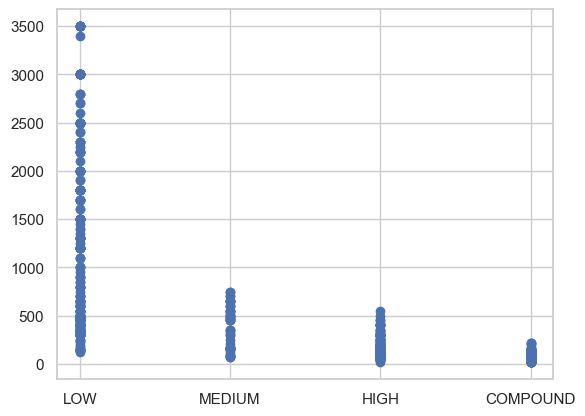

In [13]:
plt.scatter(data['density'],data['price'])
plt.show()

### Price feature 
* Most of the house prices are between 
* The average house price is 
* Keep in mind that it may be a good idea to drop extreme values. For instance, we could focus on house from \\$0 to \\$ and drop the other ones.
* It seems that there is a positive linear relationship between the price and 
* An increase in living space generally corresponds to an increase in house price.

C:\Users\T8\AppData\Local\Temp\ipykernel_13704\1355472174.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price']/data['rooms'], ax=axes[0])


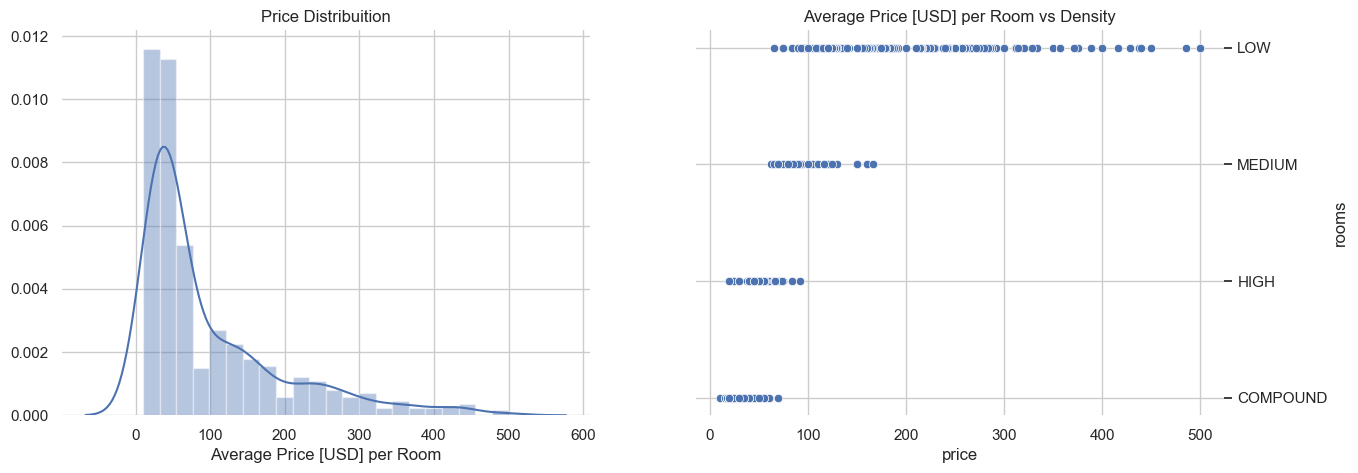

In [14]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.distplot(data['price']/data['rooms'], ax=axes[0])
sns.scatterplot(x=data['price']/data['rooms'], y='density', data=data, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Average Price [USD] per Room', ylabel='', title='Price Distribuition')
axes[1].set(xlabel='price', ylabel='rooms', title='Average Price [USD] per Room vs Density')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

C:\Users\T8\AppData\Local\Temp\ipykernel_13704\581879407.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'], ax=axes[0])


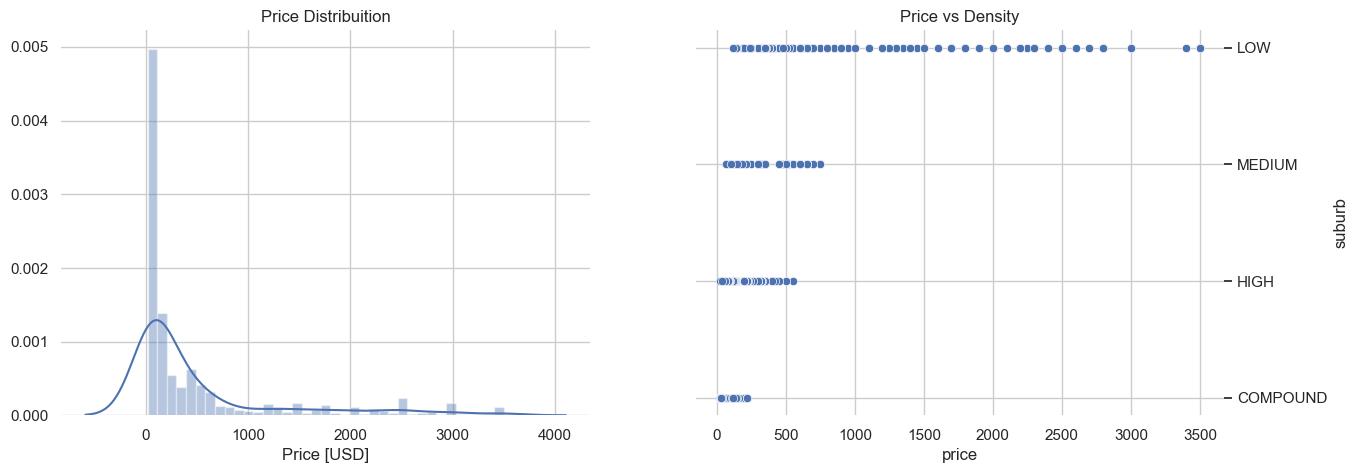

In [15]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.distplot(data['price'], ax=axes[0])
sns.scatterplot(x='price',y='density', data=data, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Price [USD]', ylabel='', title='Price Distribuition')
axes[1].set(xlabel='price', ylabel='suburb', title='Price vs Density')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

<a id="ch4"></a>
## Working with Feature Data

<a id="ch5"></a>
## Feature engineering
<hr/>

In [16]:
LabelEncoding= LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col]= LabelEncoding.fit_transform(data[col])

#data.head(2).T

In [17]:
data.to_csv('encoded.csv', index=False)

### Price correlation
***Which features are more correlated to the price?***
* This allow us to explore labels that are highly correlated to the price.

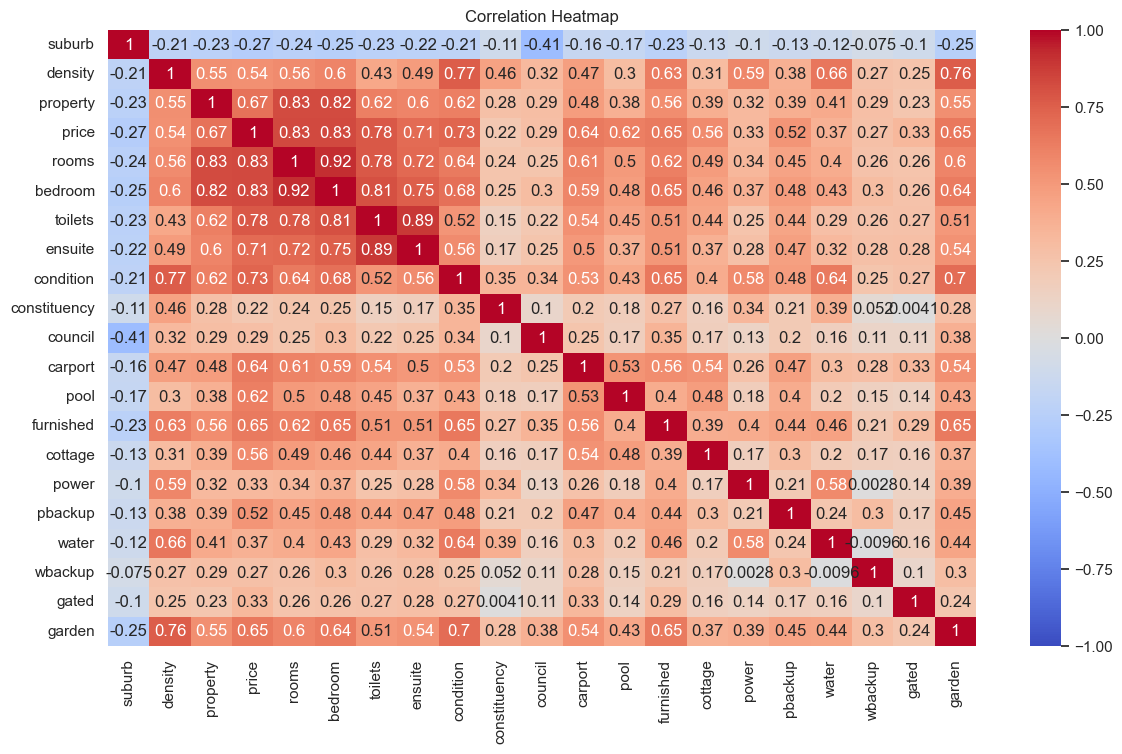

In [18]:
# Calculate the correlation matrix
correlation = data.corr()

plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(correlation, 
                      vmin=-1, vmax=1,
                      annot=True,
                      cmap="coolwarm")  # Choose a colormap (alternative options: "BrBG")
plt.title("Correlation Heatmap")
plt.show()

<a id="ch6"></a>
## Scaling and train test split

In [19]:
X = data.drop('price',axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(547, 20)
(235, 20)
(547,)
(235,)


### Normalizing / scaling the data
We scale the feature data. To prevent data leakage from the test set, we only fit our scaler to the training set.

In [21]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0
Min:  0.0


<a id="ch7"></a>
## Creating a model
***
We estimate the number of neurons (units) from our features. The optimizer is asking how you want to perform this gradient descent. In this case we are using the Adam optimizer and the mean square error loss function.

In [22]:
model = Sequential()
# input layer
model.add(Dense(20,activation='relu'))
# hidden layers
model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))

# output layer
model.add(Dense(1))

<a id="ch8"></a>
## Training the model
***
Now that the model is ready, we can fit the model into the data.

Since the data is large, we are going to use batch_size. It is typical to use batches of the power of 2 (32, 64, 128, 256).

In [23]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

In [24]:
model.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae'])

model.fit(x=X_train, y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=64,epochs=400)



Epoch 1/400


9/9 [==============================] - 3s 61ms/step - loss: 819857.1875 - mae: 492.1268 - val_loss: 839828.6875 - val_mae: 478.3333
Epoch 2/400
9/9 [==============================] - 0s 14ms/step - loss: 819573.6250 - mae: 491.9632 - val_loss: 839687.3750 - val_mae: 478.2429
Epoch 3/400
9/9 [==============================] - 0s 11ms/step - loss: 819442.5625 - mae: 491.8831 - val_loss: 839581.0625 - val_mae: 478.1829
Epoch 4/400
9/9 [==============================] - 0s 11ms/step - loss: 819371.1875 - mae: 491.8413 - val_loss: 839549.8125 - val_mae: 478.1610
Epoch 5/400
9/9 [==============================] - 0s 11ms/step - loss: 819353.1250 - mae: 491.8251 - val_loss: 839534.7500 - val_mae: 478.1470
Epoch 6/400
9/9 [==============================] - 0s 10ms/step - loss: 819336.8750 - mae: 491.8107 - val_loss: 839518.5000 - val_mae: 478.1319
Epoch 7/400
9/9 [==============================] - 0s 9ms/step - loss: 819319.7500 - mae: 491.7949 - val_loss: 839500.0625 - val_mae:

### Training loss per epoch
* This plot shows the training loss per epoch.
* This plot helps us to see if there is overfitting in the model. In this case there is no overfitting because both lines go down at the same time. 

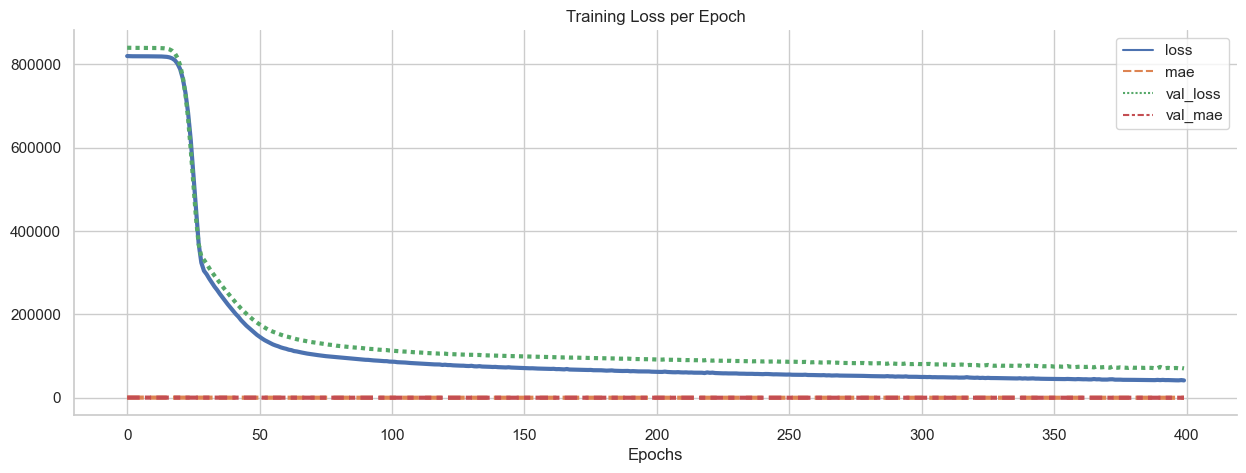

In [25]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

<a id="ch9"></a>
## Evaluation on test data
---
### Regression Evaluation Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

### Predicting on brand new data
In this part we are giving the model the test set to get a list of predictions. Then we compare the correct values with the list of predictions. We use different metrics to compare the predictions, in this case we use MAE, MSE, RMSE and Variance Regression Score. 

Let us start by analyzing the MAE, which is \\$103,500. This means that our model is off on average about \\$100,000.

***Is that MAE good or bad?***

For that we must take into account our original data set and see what kind of values we have. For instance, the mean is 540,000, therefore the MEA is about 19% of the mean price. This is not a particularly good result.

To better understand this error, we can use the variance regression score, where the best possible score is 1.0 and lower values are worse. This tells you how much variance is being explain by your model. In our case we have 0.80 which is a normal result. 

In [26]:
# predictions on the test set
predictions = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('R2 Variance Regression Score: ',explained_variance_score(y_test,predictions))

8/8 [==============================] - 0s 3ms/step
MAE:  134.06350467763048
MSE:  70481.46568738746
RMSE:  265.48345652297706
R2 Variance Regression Score:  0.8846345573887919


### Model predictions vs perfect fit
* We can compare the model predictions with a perfect fit to see how accurate the model is.
* The red line represents the perfect prediction. 
* We are being punish by the outliers, which are the expensive houses. Our model is not good predicting luxury houses.

C:\Users\T8\AppData\Local\Temp\ipykernel_13704\196135413.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

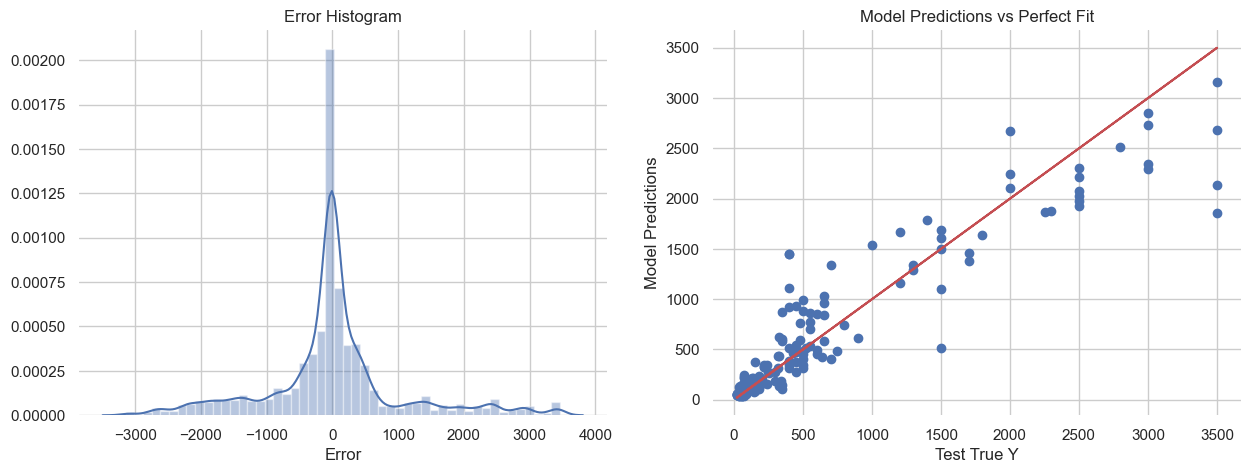

In [27]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)     

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(1, 235) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')


<a id="ch10"></a>
## Predicting on a brand new house
---
We are going to use the model to predict the price on a brand-new house. We are going to choose the first house of the data set and drop the price. single_house is going to have all the features that we need to predict the price. After that we need to reshape the variable and scale the features.

In [28]:
# fueatures of new house
single_house = data.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = scaler.transform(single_house.values.reshape(-1, 20))

# run the model and get the price prediction
print('\nPrediction Price:', model.predict(single_house)[0,0])

# original price
print('\nOriginal Price:',data.iloc[0]['price'])

Features of new house:
suburb          130
density           2
property          3
rooms             7
bedroom           4
toilets           4
ensuite           1
condition         4
constituency     12
council           2
carport           2
pool              1
furnished         1
cottage           1
power             1
pbackup           1
water             1
wbackup           1
gated             1
garden            1
Name: 0, dtype: int64
1/1 [==============================] - ETA: 0s

c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 52ms/step

Prediction Price: 2032.6158

Original Price: 3400


In [29]:
data = pd.read_csv('../data/harare-metropolian-updated.csv')
input = pd.read_csv('../data/model-input-data.csv')


data = data.astype({'rooms': 'int','bedroom': 'int', 'toilets':'int', 'ensuite':'int', 'carport':'int', 'cottage':'int'})
input = input.astype({'rooms': 'int','bedroom': 'int', 'toilets':'int', 'ensuite':'int', 'carport':'int', 'cottage':'int'})

data = pd.concat([data, input], ignore_index=True)  # Combine and reset index


print(data.tail(1).T)

                              782
suburb             DANKWERTS FARM
density                  COMPOUND
property                  CLUSTER
price                          60
rooms                           2
bedroom                         0
toilets                         1
ensuite                         0
condition                       2
constituency              HUNYANI
council       HARARE MUNICIPALITY
carport                         0
pool                            0
furnished                       0
cottage                         0
power                           0
pbackup                         0
water                           0
wbackup                         1
gated                           0
garden                          0


In [30]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   suburb        783 non-null    object
 1   density       783 non-null    object
 2   property      783 non-null    object
 3   price         783 non-null    int64 
 4   rooms         783 non-null    int32 
 5   bedroom       783 non-null    int32 
 6   toilets       783 non-null    int32 
 7   ensuite       783 non-null    int32 
 8   condition     783 non-null    int64 
 9   constituency  783 non-null    object
 10  council       783 non-null    object
 11  carport       783 non-null    int32 
 12  pool          783 non-null    int64 
 13  furnished     783 non-null    int64 
 14  cottage       783 non-null    int32 
 15  power         783 non-null    int64 
 16  pbackup       783 non-null    int64 
 17  water         783 non-null    int64 
 18  wbackup       783 non-null    int64 
 19  gated   

In [31]:
categorical_features = data.select_dtypes('object').columns

LabelEncoder = preprocessing.LabelEncoder()
for col in data[categorical_features]:
    data[col]= LabelEncoder.fit_transform(data[col])

preprocessed_text = data.tail(1)

# features of new house
single_house = preprocessed_text.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = scaler.transform(single_house.values.reshape(-1, 20))

# run the model and get the price prediction
print('\nPrediction Price:', model.predict(single_house)[0])

Features of new house:
suburb          43
density          0
property         0
rooms            2
bedroom          0
toilets          1
ensuite          0
condition        2
constituency    18
council          2
carport          0
pool             0
furnished        0
cottage          0
power            0
pbackup          0
water            0
wbackup          1
gated            0
garden           0
Name: 782, dtype: int64
1/1 [==============================] - 0s 33ms/step

Prediction Price: [59.6828]


c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
